In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# Define the base directory path
base_dir = "/Users/marcozamp/Desktop/hpc_project/Excercise_1/bcast/results"

# Define file paths using os.path.join to concatenate the base directory with the specific file names
bcast_paths = {
    "bcast_chain": os.path.join(base_dir, "bcast_chain.csv"),
    "bcast_default": os.path.join(base_dir, "bcast_default.csv")
}


for name, path in bcast_paths.items():
    # Read CSV into DataFrame
    df = pd.read_csv(path)
    # Create DataFrame with dynamic name using globals()
    globals()[f"df_{name}"] = df

/var/folders/tp/vfdk9pcj66g2trgt19fh08480000gn/T/ipykernel_5876/703147622.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_core = df_bcast_chain[df_bcast_default['Allocation'] == 'core']
/var/folders/tp/vfdk9pcj66g2trgt19fh08480000gn/T/ipykernel_5876/703147622.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_node = df_bcast_chain[df_bcast_default['Allocation'] == 'node']
/var/folders/tp/vfdk9pcj66g2trgt19fh08480000gn/T/ipykernel_5876/703147622.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_socket = df_bcast_chain[df_bcast_default['Allocation'] == 'socket']


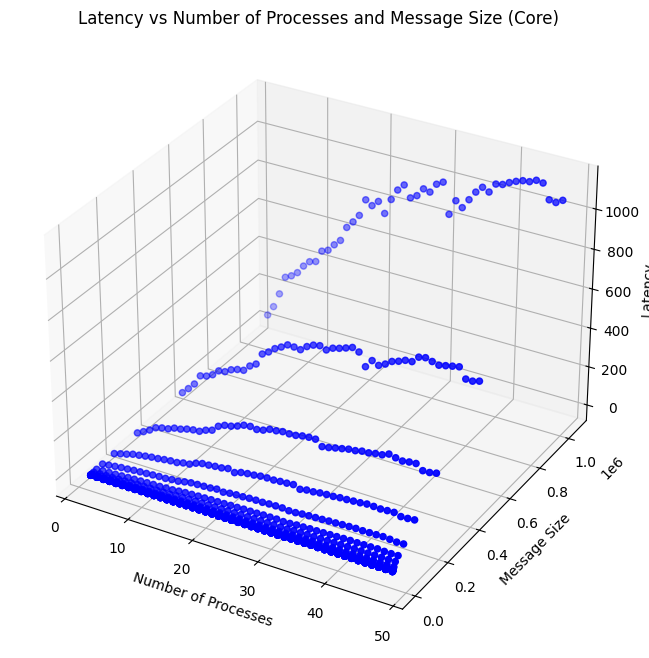

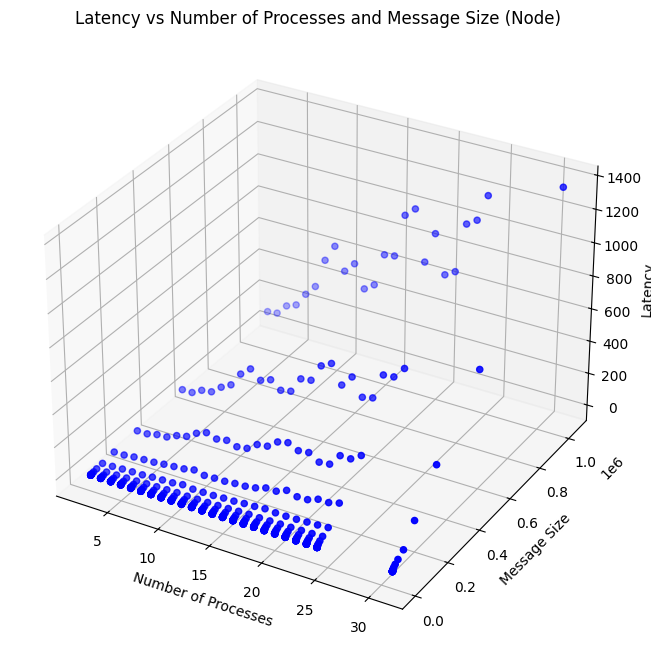

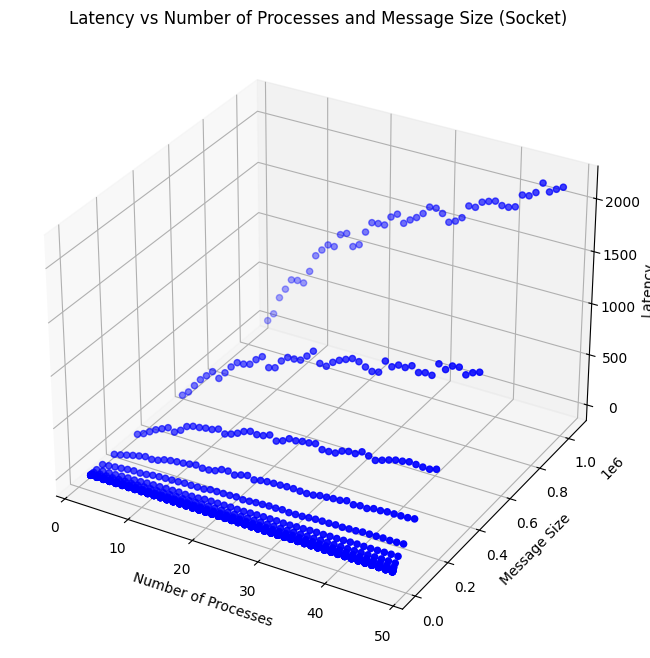

In [14]:
# Filter the DataFrame for each allocation type
df_core = df_bcast_chain[df_bcast_default['Allocation'] == 'core']
df_node = df_bcast_chain[df_bcast_default['Allocation'] == 'node']
df_socket = df_bcast_chain[df_bcast_default['Allocation'] == 'socket']

# Create 3D plots for each allocation type
for df, allocation in zip([df_core, df_node, df_socket], ['Core', 'Node', 'Socket']):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    ax.scatter(df['Processes'], df['MessageSize'], df['Latency'], c='b', marker='o')
    
    # Set labels and title
    ax.set_xlabel('Number of Processes')
    ax.set_ylabel('Message Size')
    ax.set_zlabel('Latency')
    ax.set_title(f'Latency vs Number of Processes and Message Size ({allocation})')
    
    plt.show()


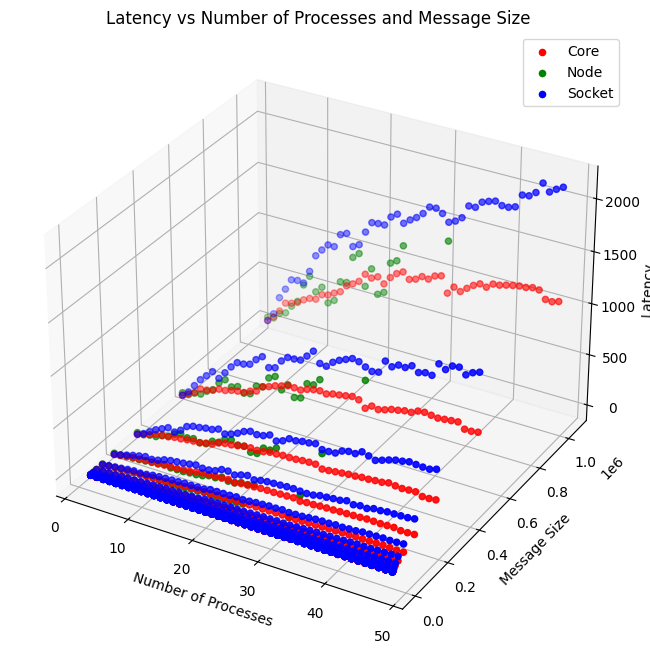

In [15]:


# Create a single plot with different colors for each allocation type
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each allocation type
for df, allocation, color in zip([df_core, df_node, df_socket], ['Core', 'Node', 'Socket'], ['r', 'g', 'b']):
    ax.scatter(df['Processes'], df['MessageSize'], df['Latency'], c=color, label=allocation, marker='o')

# Set labels and title
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Message Size')
ax.set_zlabel('Latency')
ax.set_title('Latency vs Number of Processes and Message Size')

# Add legend
ax.legend()

plt.show()
